In [1]:
import requests, zipfile, io, os, time
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
pairs = ['AUDJPY', 'AUDNZD', 'AUDUSD', 'CADJPY', 'CHFJPY', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPJPY', 'GBPUSD', 'NZDUSD', 'USDCAD']
years = ['2012', '2013', '2014', '2015', '2016', '2017']
months = ['JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER']

def get_pickle(pairs=None, years=None, months=None, directory='data'):
    def cast_to_array(param):
        if type(param) in [str, type(None)]: 
            param = [param]
        return param
    
    def filter_files(params, files = []):
        _files = []
        data_files = [f for f in os.listdir('data') if '.pickle' in f]
        for param in cast_to_array(params):
            if not param:
                break
            if len(param) == 2:
                sym = '.'
            else:
                sym = '-'
            _files = [f for f in data_files if param + sym in f]
            files += _files
        return files
    
    files = []
    files = filter_files(pairs, files)
    files = filter_files(years, files)
    files = filter_files(months, files)

    if directory[-1] != '/':
        directory += '/'
        
    df = None
    for f in files:
        _df = pd.read_pickle(directory + f)
        if type(df) != pd.DataFrame:
            df = _df
        else:
            df = pd.concat([df, _df])
            
    return df.sort_index()

def quick_plot(df):
    num_of_pairs = len(df.pair.unique())
    
    cols = int(num_of_pairs/(3-1))
    if num_of_pairs == 1:
        rows = cols = 1
    elif num_of_pairs < 3:
        rows = num_of_pairs
    else:
        rows = 3
    
    fig=plt.figure(figsize=(9*rows, 6*cols), dpi= 80, facecolor='w', edgecolor='k')
    
    for v, pair in enumerate(df.pair.unique()):
        df_pair = df[df.pair == pair]
        ax = plt.subplot(cols, rows, v + 1)
        ax.text(0.5, 0.9, pair, horizontalalignment='center',
                verticalalignment='center', transform=ax.transAxes)
        ax.plot(df_pair.index, df_pair.close)

    plt.show()

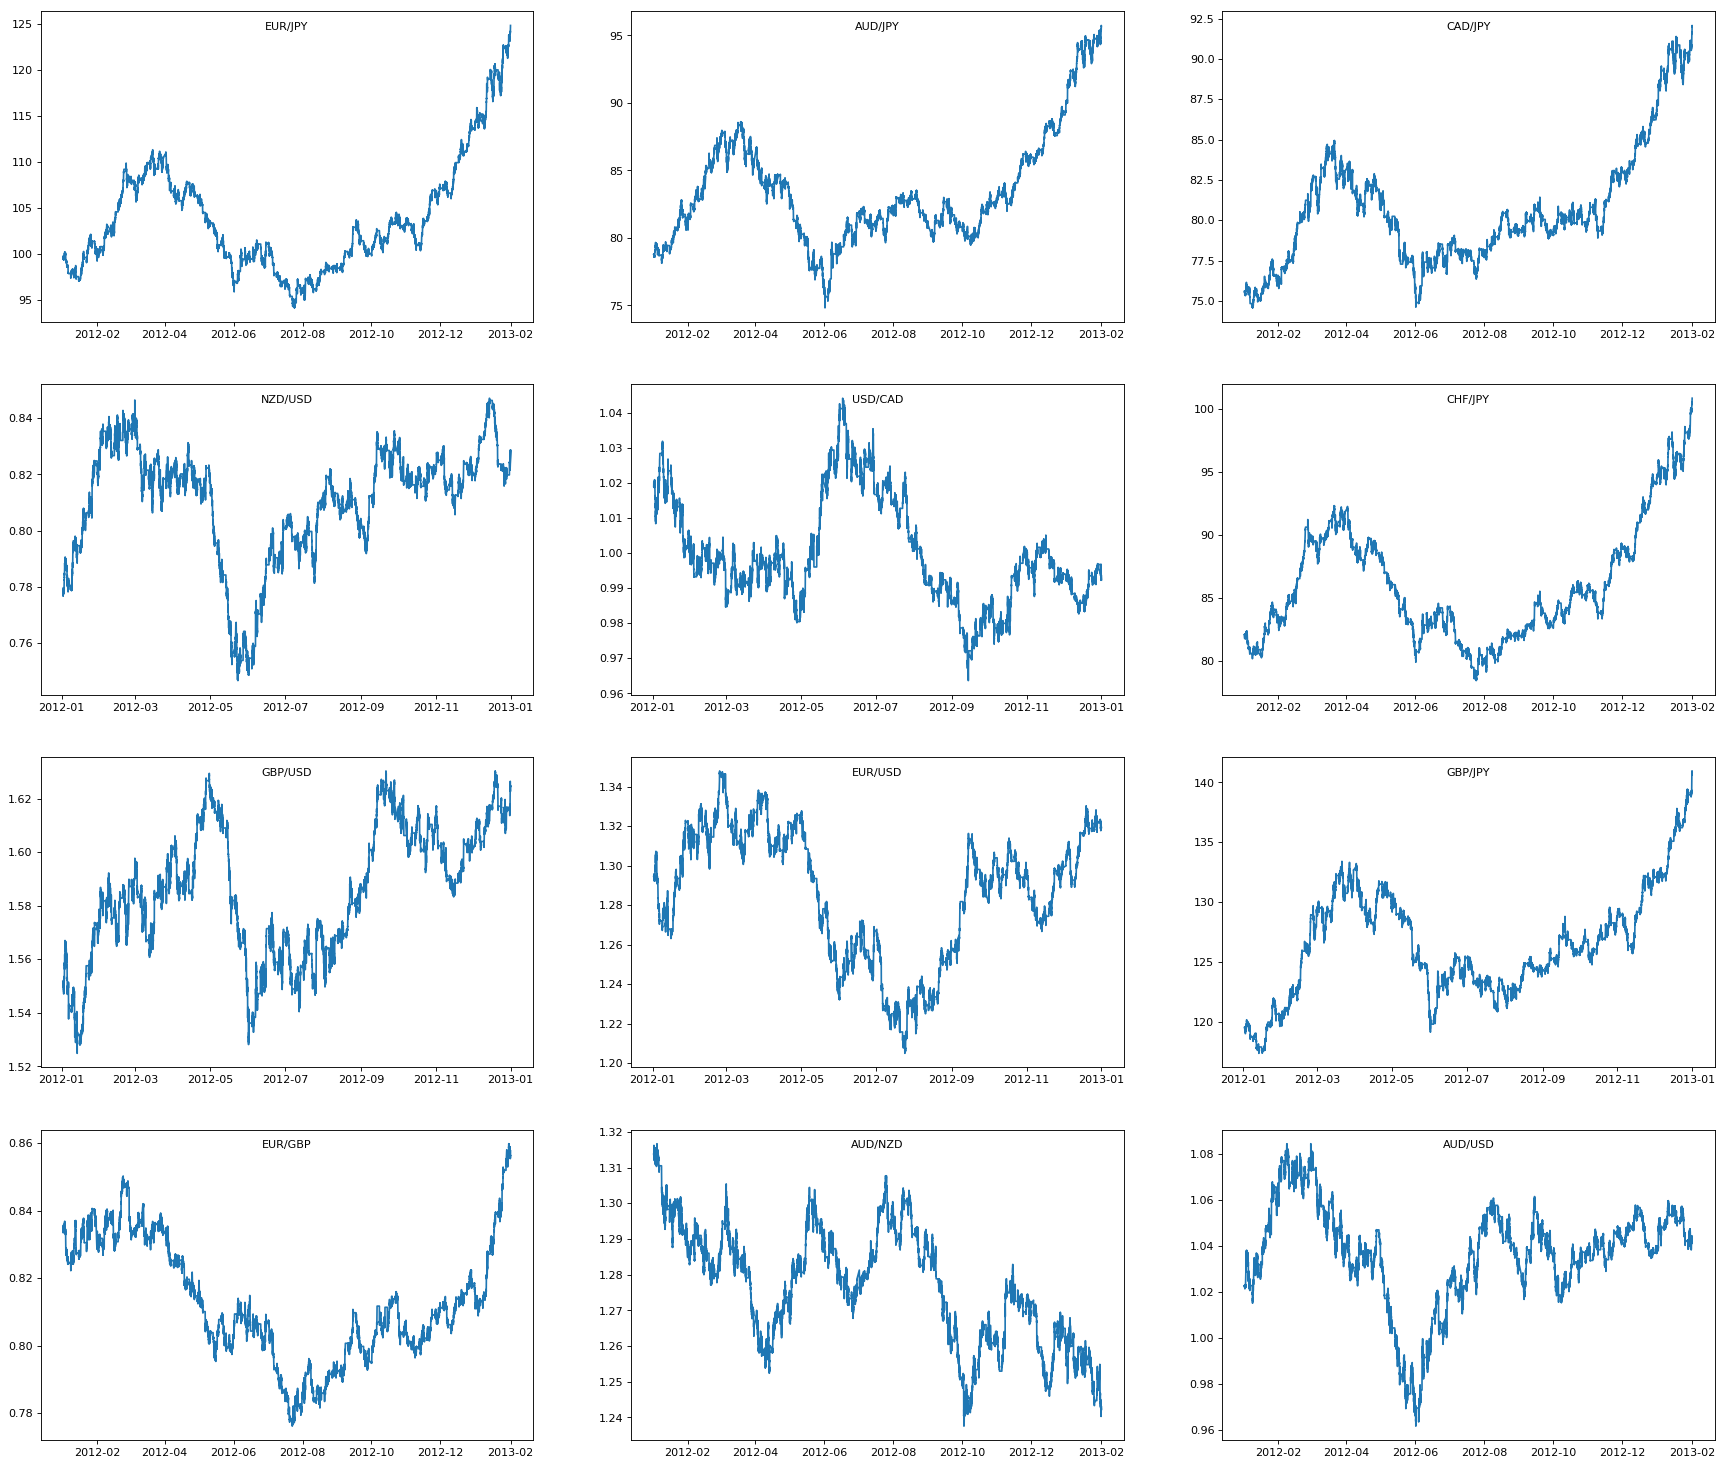

In [76]:
df = get_pickle(pairs)
quick_plot(df)